In [1]:
import pandas as pd
import numpy as np
import warnings
np.warnings = warnings
import os
import sweetviz as sv

# pandasai imports
from pandasai.llm.openai import OpenAI
from pandasai import PandasAI
from pandasai import SmartDataframe

from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

from dotenv import load_dotenv

from skimpy import skim
from summarytools import dfSummary

In [2]:
# finds .env file and loads the vars
load_dotenv()
openai_api_key = os.getenv("OPENAI_API_KEY", "Key not found")

# Load data
Here we assume that we have created the data pkl objects in prior processing (`blog_eda_2.ipynb`)

In [3]:
mirai_df = pd.read_pickle("../data/blog_eda/mirai.pkl")
benign_df = pd.read_pickle("../data/blog_eda/benign.pkl")

In [4]:
mirai_flow_df_numeric = pd.read_pickle("../data/blog_eda/mirai_flow_numeric.pkl")
benign_flow_df_numeric = pd.read_pickle("../data/blog_eda/benign_flow_numeric.pkl")

# Summaries & Visualizations

In [5]:
my_report = sv.analyze(mirai_flow_df_numeric)
my_report.show_html()

/home/drx/sandbox/cyber-ml/.venv/lib/python3.10/site-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/home/drx/sandbox/cyber-ml/.venv/lib/python3.10/site-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

/home/drx/sandbox/cyber-ml/.venv/lib/python3.10/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/home/drx/sandbox/cyber-ml/.venv/lib/python3.10/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/home/drx/sandbox/cyber-ml/.venv/lib/python3.10/site-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/home/drx/sandbox/cyber-ml/.venv/lib/python3.10/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a futu

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
my_report = sv.analyze(benign_flow_df_numeric)
my_report.show_html()

In [6]:
skim(mirai_flow_df_numeric)

Opening in existing browser session.


[0723/083256.772951:ERROR:file_io_posix.cc(153)] open /home/drx/.config/BraveSoftware/Brave-Browser/Crash Reports/pending/83df2ce0-9359-4e34-8a6c-58e503ea954c.lock: File exists (17)


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 36585  │ │ float64     │ 4     │                                                          │
│ │ Number of columns │ 8      │ │ int64       │ 4     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_nam ┃    ┃      ┃            ┃            ┃           ┃           ┃            ┃           ┃        ┃  │
│ ┃ e          ┃ NA ┃ NA % ┃ mean       ┃ sd         ┃ p0        ┃ p25       ┃ p75        ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Source     │  0 │    0 │      35000 │      21000 │         0 │     12000 │      52000 │     65000 │ ▇▁▁▇█▅ │  │
│ │ Port       │    │      │            │            │           │           │            │           │        │  │
│ │ Destinatio │  0 │    0 │       2200 │       6000 │        23 │        53 │        440 │     65000 │   █    │  │
│ │ n Port     │    │      │            │            │           │           │            │           │        │  │
│ │ Protocol   │  0 │    0 │         13 │        5.3 │         6 │         6 │         17 │        17 │ ▅    █ │  │
│ │ Number of  │  0 │    0 │        4.2 │        100 │         1 │         1 │          3 │      7900 │   █    │  │
│ │ Packets    │    │      │            │            │           │           │            │           │        │  │
│ │ Total      │  0 │    0 │        190 │       5000 │        26 │        40 │        100 │    380000 │   █    │  │
│ │ Length     │    │      │            │            │           │           │            │           │        │  │
│ │ Duration   │  0 │    0 │        330 │       1300 │         0 │         0 │          3 │      7100 │   █    │  │
│ │ Source IP  │  0 │    0 │ 3200000000 │   17000000 │         0 │ 320000000 │ 3200000000 │ 320000000 │      █ │  │
│ │ Numeric    │    │      │            │            │           │         0 │            │         0 │        │  │
│ │ Destinatio │  0 │    0 │ 2200000000 │ 1100000000 │ 130000000 │ 870000000 │ 3200000000 │ 430000000 │ ▂▃▄ █  │  │
│ │ n IP Numer │    │      │            │            │           │           │            │         0 │        │  │
│ └────────────┴────┴──────┴────────────┴────────────┴───────────┴───────────┴────────────┴───────────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [7]:
skim(benign_flow_df_numeric)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1689   │ │ float64     │ 4     │                                                          │
│ │ Number of columns │ 8      │ │ int64       │ 4     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_nam ┃    ┃      ┃            ┃            ┃          ┃            ┃            ┃           ┃        ┃  │
│ ┃ e          ┃ NA ┃ NA % ┃ mean       ┃ sd         ┃ p0       ┃ p25        ┃ p75        ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Source     │  0 │    0 │      27000 │      24000 │        7 │         53 │      50000 │     66000 │ █  ▃▄▂ │  │
│ │ Port       │    │      │            │            │          │            │            │           │        │  │
│ │ Destinatio │  0 │    0 │      21000 │      23000 │        7 │         53 │      43000 │     66000 │ █  ▃▂▂ │  │
│ │ n Port     │    │      │            │            │          │            │            │           │        │  │
│ │ Protocol   │  0 │    0 │         15 │        6.1 │        6 │         17 │         17 │        47 │   ▂█   │  │
│ │ Number of  │  0 │    0 │         11 │        110 │        1 │          1 │          5 │      3400 │   █    │  │
│ │ Packets    │    │      │            │            │          │            │            │           │        │  │
│ │ Total      │  0 │    0 │       3300 │      66000 │       26 │         60 │        480 │   2600000 │   █    │  │
│ │ Length     │    │      │            │            │          │            │            │           │        │  │
│ │ Duration   │  0 │    0 │     100000 │    4300000 │        0 │          0 │     0.0027 │ 180000000 │   █    │  │
│ │ Source IP  │  0 │    0 │ 2400000000 │ 1300000000 │        0 │ 1400000000 │ 3200000000 │ 360000000 │ ▂ ▁  █ │  │
│ │ Numeric    │    │      │            │            │          │            │            │         0 │        │  │
│ │ Destinatio │  0 │    0 │ 2300000000 │ 1400000000 │ 17000000 │ 1100000000 │ 3200000000 │ 430000000 │ ▃▁  █  │  │
│ │ n IP Numer │    │      │            │            │          │            │            │         0 │        │  │
│ └────────────┴────┴──────┴────────────┴────────────┴──────────┴────────────┴────────────┴───────────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [8]:
dfSummary(mirai_flow_df_numeric)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Source Port[float64],Mean (sd) : 35013.2 (20907.7)min < med < max:0.0 < 41283.0 < 65267.0IQR (CV) : 39110.0 (1.7),"22,952 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACzElEQVR4nO3dvW/aQBiA8fcgROajtvhosnnpGKkDEgtLt475Y7t26wBSZ4YunVhQpMiAcIMwhg4VWdIAvrMFr/X85tyZ4RHIZ+fO7Pd7Aa5d5dIfADjHzak/MMbUReTWcv7Nfr9/sRwLvDoaqjGm3u12H33fb9tMvlwuI2PMN2KFq1PfqLe+77eHw+FLEATrLBMvFgtvNBq1n5+fb0WEUOHk5E+/iEgQBOu7u7s/FvPXLcYAb3AzBRUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUOOtZP/Qo62uZhFoiZX4tk1DLpbSvZRJqCZXxtUxupqACoUIFQoUKhAoVuJnCqzRNayLiG2NspyhsHZZQr4zjgr2/2+1qNgPjOK4lSfI5DMNqtVrNtLR1UOQ6LKEWwCE2r9PpfA2CoGlz3SRJvDRNH9br9Q8RybQ8tdlsbjzPa/T7/fX9/X2U9dpFr8MSas5cng4lSeKJyMNgMPjZ6/WWWcdPp9P2ZDJpbLfbataxB81m03YNVqTAdVhCzZ/106FDaJ7nJTaxRFF0tQv2rgi1IDZPh8ocmiuWp6ACoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChX45z7kxnGnlaO7rBAqcuG608qpXVYIFblw2WnlnF1WCBW5cthp5eieBtxMQQVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKV/0ItaxnzyO7QkN1fO3L6Sib+Xy+MsZ8FxGrM5Pk36/NzmKc9VlPeF9hobq+9uVylM1sNvswHo+/hGHYs7l2mqa1OI4/tVqt35VKJcky1uWsJ7yvsFBdD9hyOcomiqJ6Dtf+2O/3f2Udn8dZT3jrrFAXi4WXdeLVapV5zP/Ecew9PT01LnFtFy6f22as6/hLXvucvv4C969UedBh+kIAAAAASUVORK5CYII="">",0(0.0%)
2,Destination Port[float64],Mean (sd) : 2179.7 (6022.5)min < med < max:23.0 < 53.0 < 65267.0IQR (CV) : 390.0 (0.4),"3,691 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACF0lEQVR4nO3YQW7aUBRG4XsLIXZAtpAbM2MJDBiyiCw2i/CUfSBZ6Fk4JlDLnXVStcQmKPzt+cbcqzc44snPu64z4N59++oDAB8xvvQDd4/NbDJw/6nrumbgLPDLX0N19zjLspckSeZDlldVtXf3V2LFtS79o06SJJlvNpsmTdNjn8UhhKgoinlZlhMzI1Rc5eLVb2aWpukxz/O3AfvjATPAb/iYggRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChYTxLZe3bftgZom7D11x6rqu+cQjQdTNQq3r+uF8Pq+Wy+VoNBodh+yoqmrv7q/EipuFejqdxlEUPa3X6+Nisdj3nQ8hREVRzMuynJgZof7nbnr1m5lNp9NjnudvA8fjTz0MZPExBQmECgk3v/q/irvHZja5YgUvDnfknwzV3eMsy16SJJkP3cGLw335UKghhKjv4sPhEJmZ1XUd7Xa7p77zIYSobduxDXuHTWaz2fNqtfoRx/F73+GmaR632+1zWZbf3b3qO49B3ruu++Mz5k/C7nnoEMc9CgAAAABJRU5ErkJggg=="">",0(0.0%)
3,Protocol[float64],1. 17.02. 6.0,"23,272 (63.6%)13,313 (36.4%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABOUlEQVR4nO3bQYqDQBRF0WcjoTNRRHAxLqIX24twNyLWIAmZVA96Db5K/bpnBT/kIiT4upyzAIdO0l3SrfQhkCS9c87P0kdcpZ/n+WcYhqn0IZBSSkfXdb9Rg+uHYZjWdX2O4/gqfUzLzvP83rZt2vf9JilmbJI0juNrWZZH6WOge+kDrvRV+gC0g9hgQ2ywITbYEBtsiA02xAYbYoMNscGG2GBDbLAhNtgQG2yIDTbEBpte+n9xr/QhrWvhO+hTSse2bZOCv7hXg5TSIeld+o6rMHj5LKEHLx1TPri08GQL/bSoSfgpX/R5XE1CT/lamMfVpIUpH7+yPwR/6sKG2GBDbLAhNtgQG2yIDTbEBhtigw2xwYbYYENssCE22BAbbIgNNsQGm9BTvqifq1bhp3zR53E1YfACmz8KW2rfhAtVNAAAAABJRU5ErkJggg=="">",0(0.0%)
4,Number of Packets[int64],Mean (sd) : 4.2 (104.8)min < med < max:1.0 < 1.0 < 7853.0IQR (CV) : 2.0 (0.0),48 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABaUlEQVR4nO3XT2oCMRiH4aSI6GYGETyMh+hhewhvIyUuqi1Iuuum1D/jov3R59km+cjiZYbU3nuBv+7pty8At5hd21BrXZZS5hPnf/TejxPPwpeLodZal+v1+nkYhtWU4YfD4bXW+iJWHnXtizofhmG13W6P4zie7hncWlvsdrvVfr+fl1KEykOu/vpLKWUcx9Nms3mbMH854Qx84zFFBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBK

In [9]:
dfSummary(benign_flow_df_numeric)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Source Port[float64],Mean (sd) : 26659.7 (24067.5)min < med < max:7.0 < 34492.0 < 65535.0IQR (CV) : 49819.0 (1.1),960 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACr0lEQVR4nO3dMW/aQByG8f9BiEyCbEFU2LJ0rNSBMXvXfth+hA4ZMmfo0okNgZCjuEE4B12aLlUDvuOEX/T8Zs620CMO+yyd2+12BrRd59QXABziYt8HnHN9M7sMPP5mt9u9BI4F/no3VOdc/+bm5mue58OQgz89Pa2cc9+IFbH2/aJe5nk+vLu7eymKYt3kwGVZZvf398PlcnlpZoSKKHunfjOzoijW4/H4V8Dx+wFjgH9wMwUJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJB+3cBx2Rmyx3zGwbcfpkmzQT6hmJ2WTZe9+rqurjYDD42el06pDzp9ykmVDPS/Amy7PZbPj4+PhhOp3+mEwmq6YnTr1JM6EmEDn9Rk+fIZssr1arvpnZ9fV16AbNZgk3aSbUI4uZfs3STp/KCPX4gqff1NOnMkJNJGT6NTPz3udmljvnQk6bb7fbXsjAtiPUFqmqqlfX9efb29tut9tt9GtsZlbXdea9/7Rer7+bWej/zFYi1BbZbDYXWZZdTafTdcid958796vX19duius7JUJtodA777c793PEEiokECokMPXjaLz3PQt/YvHuQkfSUCMv3CzhSw44rtgnFvsWOpKFGnvhZqzSKIl5YnHIQkeyUGMftbBKoyniXYF3n1gk/4/a1pccoIW7fkggVEggVEggVEjggf9/RLylf7av2p3SQaGWZZk1PfDz83NmZlZVVTafz6+aji/LMvPeX1jcgkGobDQafSmKYtB04NurdovF4qHp2NjvLGb8Kc99SF+/ASOpMUV6e6uTAAAAAElFTkSuQmCC"">",0(0.0%)
2,Destination Port[float64],Mean (sd) : 20701.5 (23372.0)min < med < max:7.0 < 3385.0 < 65535.0IQR (CV) : 43293.0 (0.9),741 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACv0lEQVR4nO3dT27aQBSA8TeFkOGPZuQQOTsuEKmLSNn4AF3msDlCFyyyzg2yi4SQrRAQjuMu2qatKgGewYJHvt+aGSz06cHYC0xd1wIcuy+HvgBgF91tLzDG9EWkF7j/uq7rZeBa4MPGUI0x/fF4fOecS0I2L4piboy5J1bE2jZRe865JMuypfd+1WTjPM/tdDpNZrNZT0QIFVG2fvWLiHjvV2mavgbs3w9YA/yHwxRUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKO/0NOpoxxvRFpBe4fF3X9XKf13MKCHXPjDH98Xh855xLQtYXRTE3xtwT678Idf96zrkky7Kl937VZGGe53Y6nSaz2awnIoT6F0Jtifd+labpa8DS/t4v5gRwmIIKTFR8iDwEirR4ECTUExMRm724uPjmvR+GvnebB0FCPSExdxzKsrQicn17e/tweXlZNF3f9kGQUI9MVVVnIuKMMSHL3Wg0SrMsK5recXh6ekoeHx8H1toy8BAo0uJBkFCPyGKxOCvL8utkMul0Op1GoYn8nIpVVV2fn59/bxrbfD4/6rsNrYYaOR1EPtlTmvV63bXWDm5ublZXV1fzput/T8W3t7dOG9d3SK2FGjsdRD7vU5rhcBh0D/bQUzFyMG0cSq2FGjsdeEqjS+xg2jaUWv+NGjodfjnq3034I2Yw7TKUOExhryIG08ahxCNUqECoUGGnr/48z23TjV9eXqyIyGKxsM/Pz4Om6/M8t1VVdSXu9tYhuPf39+4hPrOY9Yd8710+qx9gGxyBLIEUEgAAAABJRU5ErkJggg=="">",0(0.0%)
3,Protocol[float64],1. 17.02. 6.03. 41.04. 47.0,"1,272 (75.3%)378 (22.4%)35 (2.1%)4 (0.2%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABcCAYAAAB5jMeAAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACBklEQVR4nO3bQW7TUBSG0esoKnTiKIrUJcAevAgWyyKyCPYQRfGAlE7MoAVBxATh/H4y58wyu1I+2XnRu900TQUJm6UH4P8hNmK6qnqsqoelB2FWL9M0XZce4tb2cDh86vt+v/QgzGccx3PXdZ9bC27b9/1+GIbrbrd7XnoY/t3lcnl/PB73p9Ppoaraiq2qarfbPT89PX1dehhm87j0AH/igECM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxGyrXq+lLD0I82j5u9yO43g+Ho/7avRaCn9vHMdzVb0sPcct18LXqclr4Z1VPlIcEIhp7TXa5OOfeTS1XdXqVhDzaGa7quWtIObR2naVv19WzAGBGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzHNrPK1MAP31dQqX6sraMzDDgIxVvmIuX2yebJwN79tV9lu4p42P7arhmG4vkXXyu83VubndtXb58VPpKyXP3WJERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixEdPMdhXr9+t2le0m7soOAjG2q4hxQCBm03Xdx67rHBC4u01Vfaiqd0sPwvp5jRIjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI2YTVV9qapvSw/C+ll4IcZrlBixEfMd6iScShhmFWYAAAAASUVORK5CYII="">",0(0.0%)
4,Number of Packets[int64],Mean (sd) : 11.0 (105.4)min < med < max:1.0 < 1.0 < 3368.0IQR (CV) : 4.0 (0.1),67 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bG

# EDA with Pandas AI

In [10]:
# Instantiate a LLM
llm = OpenAI(api_token=openai_api_key)
pandas_ai = PandasAI(llm)

In [11]:
mirai_smart = SmartDataframe(
    df=pd.DataFrame(mirai_flow_df_numeric), config={"llm": llm}
)
mirai_clean_df = mirai_smart.clean_data()

In [12]:
benign_smart = SmartDataframe(
    df=pd.DataFrame(benign_flow_df_numeric), config={"llm": llm}
)
benign_clean_df = benign_smart.clean_data()

In [13]:
mirai_clean_df

,Source Port,Destination Port,Protocol,Number of Packets,Total Length,Duration,Source IP Numeric,Destination IP Numeric
0,68.0,67.0,17.0,27,4482,6131.120998,0,4294967295
1,23.0,21897.0,6.0,1432,37232,2375.572448,3232236033,3232236142
2,23.0,46734.0,6.0,30,780,47.907811,3232236033,3232236142
3,23.0,50364.0,6.0,75,1950,122.722774,3232236033,3232236142
4,23.0,52777.0,6.0,20,520,31.410413,3232236033,3232236142
...,...,...,...,...,...,...,...,...
36580,52413.0,123.0,17.0,1,56,0.000000,3232236228,3349498891
36581,33119.0,123.0,17.0,1,56,0.000000,3232236228,3632630861
36582,42414.0,123.0,17.0,1,56,0.000000,3232236228,3632630861
36583,49134.0,123.0,17.0,1,56,0.000000,3232236228,1123232514


In [14]:
benign_clean_df

,Source Port,Destination Port,Protocol,Number of Packets,Total Length,Duration,Source IP Numeric,Destination IP Numeric
0,68.0,67.0,17.0,9,2945,1.766763e+08,0,4294967295
1,53.0,61696.0,17.0,1,88,0.000000e+00,16843009,2886738307
2,53.0,33538.0,17.0,1,92,0.000000e+00,16843009,3232236373
3,53.0,34035.0,17.0,1,111,0.000000e+00,16843009,3232236373
4,53.0,39653.0,17.0,1,110,0.000000e+00,16843009,3232236373
...,...,...,...,...,...,...,...,...
1684,500.0,500.0,17.0,13,3528,4.310492e+02,1574750820,1352297700
1685,123.0,123.0,17.0,17,952,5.198236e+02,1585590714,3232246283
1686,500.0,500.0,17.0,18,4738,4.338344e+02,1601469645,1352297700
1687,53.0,26323.0,17.0,1,123,0.000000e+00,1632267530,3232237365


In [15]:
top_5_source_IPs = pandas_ai(
    mirai_clean_df, prompt="Which are the 5 most popular source IP addresses?"
)
top_5_source_IPs

,Source IP Numeric,Count
9,3232236142,6361
11,3232236144,6247
8,3232236141,5483
13,3232236147,3752
12,3232236145,3667


In [16]:
top_5_dst_ports = pandas_ai(
    mirai_clean_df, prompt="Which are the 5 most popular destination ports?"
)
top_5_dst_ports

,Destination Port,Count
1,53.0,19427
4,80.0,6919
8,443.0,1678
3361,8280.0,1547
3357,8000.0,1385


Traceback (most recent call last):
  File "/home/drx/sandbox/cyber-ml/.venv/lib/python3.10/site-packages/pandasai/smart_datalake/__init__.py", line 314, in chat
    result = self._code_manager.execute_code(
  File "/home/drx/sandbox/cyber-ml/.venv/lib/python3.10/site-packages/pandasai/helpers/code_manager.py", line 199, in execute_code
    return analyze_data(self._get_original_dfs())
  File "<string>", line 7, in analyze_data
  File "/home/drx/sandbox/cyber-ml/.venv/lib/python3.10/site-packages/matplotlib/pyplot.py", line 1023, in savefig
    res = fig.savefig(*args, **kwargs)
  File "/home/drx/sandbox/cyber-ml/.venv/lib/python3.10/site-packages/matplotlib/figure.py", line 3343, in savefig
    self.canvas.print_figure(fname, **kwargs)
  File "/home/drx/sandbox/cyber-ml/.venv/lib/python3.10/site-packages/matplotlib/backend_bases.py", line 2366, in print_figure
    result = print_method(
  File "/home/drx/sandbox/cyber-ml/.venv/lib/python3.10/site-packages/matplotlib/backend_bases.py", 

"Unfortunately, I was not able to answer your question, because of the following error:\n\n[Errno 2] No such file or directory: 'exports/charts/temp_chart.png'\n"

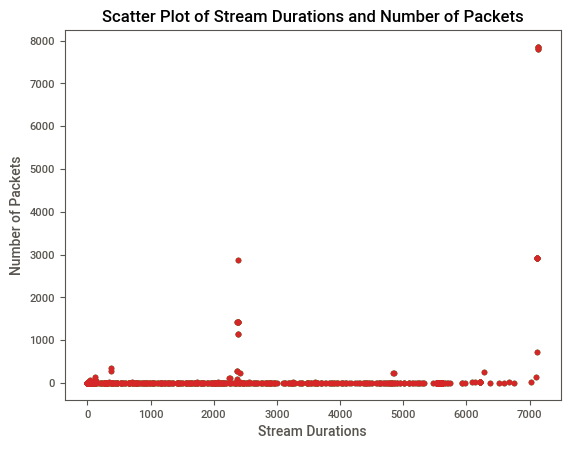

In [17]:
pandas_ai.run(
    mirai_clean_df,
    prompt="Plot the scatter plot of stream durations and number of packets.",
)

Traceback (most recent call last):
  File "/home/drx/sandbox/cyber-ml/.venv/lib/python3.10/site-packages/pandasai/smart_datalake/__init__.py", line 314, in chat
    result = self._code_manager.execute_code(
  File "/home/drx/sandbox/cyber-ml/.venv/lib/python3.10/site-packages/pandasai/helpers/code_manager.py", line 199, in execute_code
    return analyze_data(self._get_original_dfs())
  File "<string>", line 9, in analyze_data
  File "/home/drx/sandbox/cyber-ml/.venv/lib/python3.10/site-packages/matplotlib/pyplot.py", line 1023, in savefig
    res = fig.savefig(*args, **kwargs)
  File "/home/drx/sandbox/cyber-ml/.venv/lib/python3.10/site-packages/matplotlib/figure.py", line 3343, in savefig
    self.canvas.print_figure(fname, **kwargs)
  File "/home/drx/sandbox/cyber-ml/.venv/lib/python3.10/site-packages/matplotlib/backend_bases.py", line 2366, in print_figure
    result = print_method(
  File "/home/drx/sandbox/cyber-ml/.venv/lib/python3.10/site-packages/matplotlib/backend_bases.py", 

"Unfortunately, I was not able to answer your question, because of the following error:\n\nname 'plt' is not defined\n"

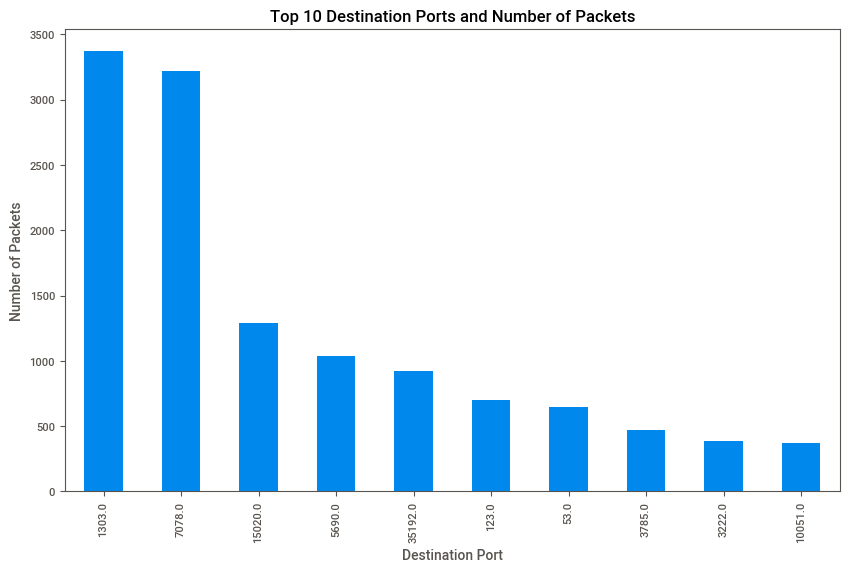

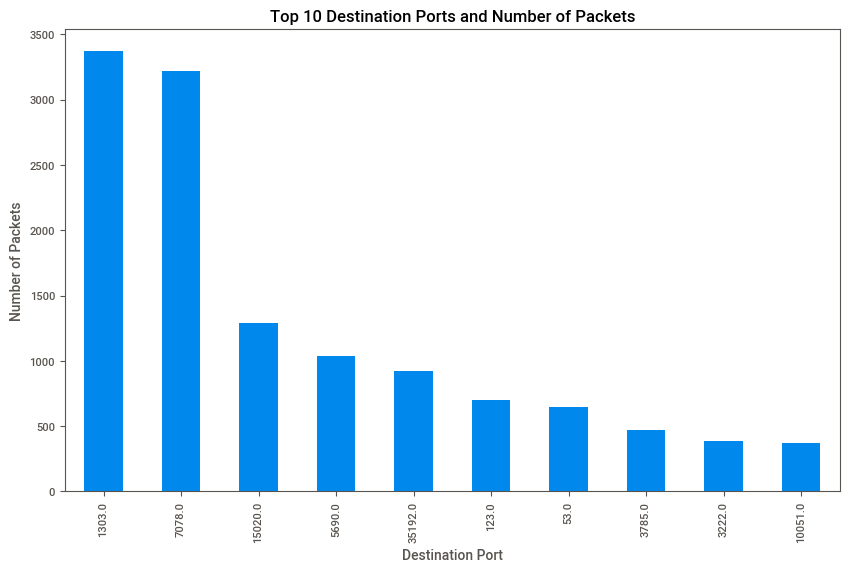

In [18]:
pandas_ai.run(
    benign_clean_df,
    prompt="Plot a barplot of top 10 destination ports and number of packets.",
)

# Feature Engineering with Pandas AI

In [19]:
mirai_clean_df.generate_features()

,Source Port,Destination Port,Protocol,Number of Packets,Total Length,Duration,Source IP Numeric,Destination IP Numeric,Packet Length Ratio,Duration per Packet
0,68.0,67.0,17.0,27,4482,6131.120998,0,4294967295,166.0,227.078555
1,23.0,21897.0,6.0,1432,37232,2375.572448,3232236033,3232236142,26.0,1.658919
2,23.0,46734.0,6.0,30,780,47.907811,3232236033,3232236142,26.0,1.596927
3,23.0,50364.0,6.0,75,1950,122.722774,3232236033,3232236142,26.0,1.636304
4,23.0,52777.0,6.0,20,520,31.410413,3232236033,3232236142,26.0,1.570521
...,...,...,...,...,...,...,...,...,...,...
36580,52413.0,123.0,17.0,1,56,0.000000,3232236228,3349498891,56.0,0.000000
36581,33119.0,123.0,17.0,1,56,0.000000,3232236228,3632630861,56.0,0.000000
36582,42414.0,123.0,17.0,1,56,0.000000,3232236228,3632630861,56.0,0.000000
36583,49134.0,123.0,17.0,1,56,0.000000,3232236228,1123232514,56.0,0.000000


In [20]:
benign_clean_df.generate_features()

,Source Port,Destination Port,Protocol,Number of Packets,Total Length,Duration,Source IP Numeric,Destination IP Numeric,Packet Length Ratio,Duration per Packet
0,68.0,67.0,17.0,9,2945,1.766763e+08,0,4294967295,327.222222,1.963070e+07
1,53.0,61696.0,17.0,1,88,0.000000e+00,16843009,2886738307,88.000000,0.000000e+00
2,53.0,33538.0,17.0,1,92,0.000000e+00,16843009,3232236373,92.000000,0.000000e+00
3,53.0,34035.0,17.0,1,111,0.000000e+00,16843009,3232236373,111.000000,0.000000e+00
4,53.0,39653.0,17.0,1,110,0.000000e+00,16843009,3232236373,110.000000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
1684,500.0,500.0,17.0,13,3528,4.310492e+02,1574750820,1352297700,271.384615,3.315763e+01
1685,123.0,123.0,17.0,17,952,5.198236e+02,1585590714,3232246283,56.000000,3.057786e+01
1686,500.0,500.0,17.0,18,4738,4.338344e+02,1601469645,1352297700,263.222222,2.410191e+01
1687,53.0,26323.0,17.0,1,123,0.000000e+00,1632267530,3232237365,123.000000,0.000000e+00
